# Influence of Size of Government on Economic Growth and Institutions as Mediators

# Content

**Part 0: Data description, goals and hypothesises of the research
<br>
<br>
Part 1: Data extraction and preprocessing
<br>
<br>
Part 2: Exploratory analysis
<br>
<br>
Part 3: Panel regression with growth as dependend variable and size of government as well as other covariats as independent variables
<br>
<br>
Part 4: Adding institution to observe their influence on connection between government size and economic growth
<br>
<br>
Part 5: Adding instrumental variables to dealing with endogenity issues
<br>
<br>
Part 6: Conclusion**

# Part 0: Data description, goals and hypothesises of the research

The aim of this study is to identify the impact of the public sector size on economic growth in the 21st century and to examine how the institutional environment influences the nature of this impact.
<br>
The dataset includes all countries worldwide from 2000 to 2020, based on World Bank databases.
<br>
The hypothesis suggests that a large public sector hinders economic growth; however, high-quality institutions mitigate this negative effect.

# Part 1: Data extraction and preprocessing

In [466]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import wbgapi as wb

from linearmodels import PanelOLS
from linearmodels import RandomEffects
from linearmodels import PooledOLS
import statsmodels.api as sm

from linearmodels.iv import IV2SLS

In [506]:
# examining all World Bank data bases and their codes
wb.source.info()

id,name,code,concepts,lastupdated
1,Doing Business,DBS,3,2021-08-18
2,World Development Indicators,WDI,3,2022-07-20
3,Worldwide Governance Indicators,WGI,3,2021-09-27
5,Subnational Malnutrition Database,SNM,3,2016-03-21
6,International Debt Statistics,IDS,4,2022-01-14
11,Africa Development Indicators,ADI,3,2013-02-22
12,Education Statistics,EDS,3,2020-12-20
13,Enterprise Surveys,ESY,3,2022-03-25
14,Gender Statistics,GDS,3,2022-06-23
15,Global Economic Monitor,GEM,3,2020-07-27


In [468]:
# Extracting various institution quality indicators from 2000 to 2020
wb.db = 3
governance_indicators = wb.data.DataFrame(['CC.EST', 'GE.EST', 'PV.EST', 'RQ.EST', 'RL.EST', 'VA.EST'], time=range(2000, 2021))
governance_indicators

YR2000    YR2002    YR2003    YR2004    YR2005    YR2006  \
economy series                                                               
ABW     CC.EST       NaN       NaN       NaN  1.184472  1.278153  1.259531   
        GE.EST       NaN       NaN       NaN  1.301713  1.292862  1.285327   
        PV.EST       NaN       NaN       NaN  0.993855  1.379847  1.305753   
        RL.EST       NaN       NaN       NaN  0.929806  0.857203  0.820513   
        RQ.EST       NaN       NaN       NaN  0.771958  0.866325  0.856050   
...                  ...       ...       ...       ...       ...       ...   
ZWE     GE.EST -0.799372 -0.908140 -1.006667 -1.000913 -1.331712 -1.225054   
        PV.EST -1.322906 -1.521978 -1.088343 -1.207500 -1.272914 -0.932961   
        RL.EST -1.340581 -1.592860 -1.700848 -1.801661 -1.818298 -1.740026   
        RQ.EST -1.416606 -1.933147 -1.975507 -2.063846 -2.236245 -1.959043   
        VA.EST -1.085388 -1.363361 -1.431192 -1.553577 -1.674941 -1.539244   

                  YR2007    YR2008    YR2009    YR2010    YR2011    YR2012  \
economy series                                                               
ABW     CC.EST  1.269965  1.288655  1.116361  1.127541  1.110036  1.102628   
        GE.EST  1.252985  1.279326  1.500568  1.251488  1.242021  1.254594   
        PV.EST  1.287163  1.319141  1.122499  1.100847  1.285738  1.263882   
        RL.EST  0.839394  0.855813  1.433195  1.423003  1.330773  1.316149   
        RQ.EST  0.877562  0.894550  1.291655  1.347078  1.322830  1.408916   
...                  ...       ...       ...       ...       ...       ...   
ZWE     GE.EST -1.258882 -1.528042 -1.545878 -1.511907 -1.371557 -1.336316   
        PV.EST -1.108968 -1.213945 -1.167150 -1.104014 -0.945329 -0.778662   
        RL.EST -1.798533 -1.781623 -1.852296 -1.823184 -1.779590 -1.629900   
        RQ.EST -2.156215 -2.140830 -2.117831 -2.070647 -1.934900 -1.888528   
        VA.EST -1.571521 -1.549031 -1.539211 -1.475183 -1.463763 -1.471968   

                  YR2013    YR2014    YR2015    YR2016    YR2017    YR2018  \
economy series                                                               
ABW     CC.EST  1.126580  1.019108  1.297560  1.285871  1.294589  1.252447   
        GE.EST  1.227173  0.891464  0.883258  0.892866  0.919964  1.056812   
        PV.EST  1.312226  1.164568  1.230921  1.284199  1.335038  1.356553   
        RL.EST  1.299672  1.038239  1.260903  1.261825  1.335014  1.297677   
        RQ.EST  1.429111  1.250432  1.371496  1.347553  1.194347  0.856184   
...                  ...       ...       ...       ...       ...       ...   
ZWE     GE.EST -1.277940 -1.211193 -1.158085 -1.158399 -1.182262 -1.198210   
        PV.EST -0.665950 -0.713570 -0.618156 -0.619938 -0.708769 -0.722774   
        RL.EST -1.579199 -1.431367 -1.317583 -1.368501 -1.373646 -1.272543   
        RQ.EST -1.843716 -1.903126 -1.653554 -1.720110 -1.561047 -1.504843   
        VA.EST -1.386220 -1.256964 -1.165902 -1.177471 -1.195013 -1.140979   

                  YR2019    YR2020  
economy series                      
ABW     CC.EST  1.217546  1.235405  
        GE.EST  1.029622  1.129532  
        PV.EST  1.349796  1.384053  
        RL.EST  1.263350  1.306116  
        RQ.EST  0.857441  0.923870  
...                  ...       ...  
ZWE     GE.EST -1.204820 -1.250607  
        PV.EST -0.959749 -1.080208  
        RL.EST -1.257262 -1.274851  
        RQ.EST -1.462590 -1.422032  
        VA.EST -1.159892 -1.121479  

[1284 rows x 20 columns]

In [469]:
# Creating a function to transform data to easily readable look
def wb_to_panel_format(df):
    
    df_stucked = df.stack()
    df_stucked.index.names = ['country', 'indicator', 'year']
    
    df_unstucked = df_stucked.unstack(1)
    
    df_unstucked = pd.DataFrame(df_unstucked)
    df_unstucked.columns = [''] * len(df_unstucked.columns)
    df_unstucked = df_unstucked.reset_index()
    
    columns_list = []
    [columns_list.append(i) for i in range(len(df_unstucked.columns))]
    columns_list.insert(1, len(df_unstucked.columns)-1)
    columns_list.pop()
    
    df_unstucked[['A', 'B']] = df_unstucked['year'].str.split('R', 1, expand=True)
    df_unstucked = df_unstucked.drop(columns=['year', 'A'])
    df_unstucked = df_unstucked.iloc[:, columns_list]
    df_unstucked = df_unstucked.rename(columns={'B': 'year'})
    
    return df_unstucked

In [470]:
df_governance = wb_to_panel_format(governance_indicators)
# We are getting 6 principle indicators of institutional quality: government effectiveness, corruption level, 
# political stability, rule of law, regulation quality, accaoutability and transparency
df_governance.columns = ['country', 'year', 'corruption', 'gov_effectiv', 'pol_stab', 'rule_law', 'reg_qual', 'accountability']
df_governance

,country,year,corruption,gov_effectiv,pol_stab,rule_law,reg_qual,accountability
0,ABW,2004,1.184472,1.301713,0.993855,0.929806,0.771958,0.737521
1,ABW,2005,1.278153,1.292862,1.379847,0.857203,0.866325,1.153230
2,ABW,2006,1.259531,1.285327,1.305753,0.820513,0.856050,1.017273
3,ABW,2007,1.269965,1.252985,1.287163,0.839394,0.877562,0.972129
4,ABW,2008,1.288655,1.279326,1.319141,0.855813,0.894550,0.967198
...,...,...,...,...,...,...,...,...
4203,ZWE,2016,-1.259222,-1.158399,-0.619938,-1.368501,-1.720110,-1.177471
4204,ZWE,2017,-1.271278,-1.182262,-0.708769,-1.373646,-1.561047,-1.195013
4205,ZWE,2018,-1.230871,-1.198210,-0.722774,-1.272543,-1.504843,-1.140979
4206,ZWE,2019,-1.236825,-1.204820,-0.959749,-1.257262,-1.462590,-1.159892


In [471]:
df_governance.corr()

,corruption,gov_effectiv,pol_stab,rule_law,reg_qual,accountability
corruption,1.000000,0.923996,0.744735,0.940794,0.868500,0.773976
gov_effectiv,0.923996,1.000000,0.698064,0.932194,0.935720,0.745648
pol_stab,0.744735,0.698064,1.000000,0.776447,0.650363,0.681867
rule_law,0.940794,0.932194,0.776447,1.000000,0.904297,0.817322
reg_qual,0.868500,0.935720,0.650363,0.904297,1.000000,0.769393
accountability,0.773976,0.745648,0.681867,0.817322,0.769393,1.000000


All the 6 indicators are highly correleted with each other

In [472]:
# Extracting main economic indicators - economic growth and size of government (share of government spendings in GDP) 
# As well as covariates: inflation, opennes to trade, population growth, capital accumulation, 
# GDP and GDP per capita
wb.db = 2
main_indicators = wb.data.DataFrame(['NY.GDP.PCAP.KD.ZG', 'NE.CON.GOVT.ZS', 'FP.CPI.TOTL.ZG', 'NE.GDI.TOTL.ZS', 'NE.TRD.GNFS.ZS', 'SP.POP.GROW', 'NY.GDP.MKTP.KD', 'NY.GDP.PCAP.KD'], time=range(2000, 2021))
main_indicators

YR2000        YR2001        YR2002  \
economy series                                                        
ABW     FP.CPI.TOTL.ZG     4.044021e+00  2.883604e+00  3.315247e+00   
        NE.CON.GOVT.ZS     2.141366e+01  2.483063e+01  2.488610e+01   
        NE.GDI.TOTL.ZS     2.549955e+01  2.400589e+01  2.662301e+01   
        NE.TRD.GNFS.ZS     1.450939e+02  1.403829e+02  1.332005e+02   
        NY.GDP.MKTP.KD     2.584458e+09  2.692901e+09  2.667109e+09   
...                                 ...           ...           ...   
ZWE     NE.TRD.GNFS.ZS     7.406741e+01  6.789787e+01  6.680735e+01   
        NY.GDP.MKTP.KD     2.015994e+10  2.045017e+10  1.863133e+10   
        NY.GDP.PCAP.KD     1.696753e+03  1.715056e+03  1.558547e+03   
        NY.GDP.PCAP.KD.ZG -3.538612e+00  1.078704e+00 -9.125609e+00   
        SP.POP.GROW        4.957781e-01  3.564239e-01  2.545168e-01   

                                 YR2003        YR2004        YR2005  \
economy series                                                        
ABW     FP.CPI.TOTL.ZG     3.656365e+00  2.529129e+00  3.397787e+00   
        NE.CON.GOVT.ZS     2.443291e+01  2.289395e+01  2.284564e+01   
        NE.GDI.TOTL.ZS     2.888767e+01  2.844400e+01  3.316761e+01   
        NE.TRD.GNFS.ZS     1.327958e+02  1.324331e+02  1.450758e+02   
        NY.GDP.MKTP.KD     2.697004e+09  2.893373e+09  2.882236e+09   
...                                 ...           ...           ...   
ZWE     NE.TRD.GNFS.ZS     7.045199e+01  7.603961e+01  7.604371e+01   
        NY.GDP.MKTP.KD     1.546492e+10  1.456679e+10  1.373487e+10   
        NY.GDP.PCAP.KD     1.290656e+03  1.211888e+03  1.137303e+03   
        NY.GDP.PCAP.KD.ZG -1.718853e+01 -6.102906e+00 -6.154441e+00   
        SP.POP.GROW        2.333340e-01  3.140724e-01  4.713203e-01   

                                 YR2006        YR2007        YR2008  \
economy series                                                        
ABW     FP.CPI.TOTL.ZG     3.608024e+00  5.392568e+00  8.955987e+00   
        NE.CON.GOVT.ZS     2.232527e+01  2.140622e+01  2.124189e+01   
        NE.GDI.TOTL.ZS     3.451708e+01  3.175464e+01  3.210847e+01   
        NE.TRD.GNFS.ZS     1.410541e+02  1.399541e+02  1.391236e+02   
        NY.GDP.MKTP.KD     2.915062e+09  3.005333e+09  3.060434e+09   
...                                 ...           ...           ...   
ZWE     NE.TRD.GNFS.ZS     8.282065e+01  8.417290e+01  1.095216e+02   
        NY.GDP.MKTP.KD     1.325943e+10  1.277502e+10  1.051781e+10   
        NY.GDP.PCAP.KD     1.090818e+03  1.042355e+03  8.496116e+02   
        NY.GDP.PCAP.KD.ZG -4.087314e+00 -4.442784e+00 -1.849118e+01   
        SP.POP.GROW        6.503685e-01  8.227672e-01  1.003707e+00   

                                 YR2009  ...        YR2011        YR2012  \
economy series                           ...                               
ABW     FP.CPI.TOTL.ZG    -2.135429e+00  ...  4.316297e+00  6.274720e-01   
        NE.CON.GOVT.ZS     2.483045e+01  ...  2.511648e+01  2.616962e+01   
        NE.GDI.TOTL.ZS     2.964340e+01  ...  2.742482e+01  2.352062e+01   
        NE.TRD.GNFS.ZS     1.375629e+02  ...  1.544261e+02  1.566546e+02   
        NY.GDP.MKTP.KD     2.702866e+09  ...  2.717520e+09  2.689383e+09   
...                                 ...  ...           ...           ...   
ZWE     NE.TRD.GNFS.ZS     6.177844e+01  ...  8.946653e+01  7.416253e+01   
        NY.GDP.MKTP.KD     1.178201e+10  ...  1.610152e+10  1.878490e+10   
        NY.GDP.PCAP.KD     9.405317e+02  ...  1.248729e+03  1.432306e+03   
        NY.GDP.PCAP.KD.ZG  1.070137e+01  ...  1.245284e+01  1.470108e+01   
        SP.POP.GROW        1.183728e+00  ...  1.536406e+00  1.698084e+00   

                                 YR2013        YR2014        YR2015  \
economy series                                                        
ABW     FP.CPI.TOTL.ZG    -2.372065e+00  4.214409e-01  4.747636e-01   
        NE.CON.GOVT.ZS     2.619291e+01  2.481986e+01  2.32

In [473]:
df_main_indicators = wb_to_panel_format(main_indicators)
df_main_indicators.columns = ['country', 'year', 'inflation', 'gov_size', 'capital', 'trade', 'gdp', 'gdp_pc', 'growth', 'population']
df_main_indicators

,country,year,inflation,gov_size,capital,trade,gdp,gdp_pc,growth,population
0,ABW,2000,4.044021,21.413659,25.499553,145.093946,2.584458e+09,28442.516118,5.417262,2.064841
1,ABW,2001,2.883604,24.830633,24.005891,140.382916,2.692901e+09,28989.585239,1.923420,2.205163
2,ABW,2002,3.315247,24.886105,26.623007,133.200456,2.667109e+09,28077.193146,-3.147310,2.235515
3,ABW,2003,3.656365,24.432905,28.887674,132.795846,2.697004e+09,27799.577350,-0.988759,2.108324
4,ABW,2004,2.529129,22.893954,28.444004,132.433102,2.893373e+09,29301.763552,5.403630,1.765473
...,...,...,...,...,...,...,...,...,...,...
5551,ZWE,2016,-1.543670,18.123938,9.861371,51.219025,2.011402e+10,1433.608776,-0.793105,1.549294
5552,ZWE,2017,0.893962,21.650656,9.700147,50.029712,2.106128e+10,1479.376056,3.192453,1.459406
5553,ZWE,2018,10.618866,11.918540,9.687734,69.447021,2.207732e+10,1529.026374,3.356166,1.410382
5554,ZWE,2019,255.304991,6.635067,7.408702,63.281915,2.072084e+10,1414.829099,-7.468627,1.421142


In [474]:
df = pd.merge(df_main_indicators, df_governance, on=['country', 'year'], how='left')
df

,country,year,inflation,gov_size,capital,trade,gdp,gdp_pc,growth,population,corruption,gov_effectiv,pol_stab,rule_law,reg_qual,accountability
0,ABW,2000,4.044021,21.413659,25.499553,145.093946,2.584458e+09,28442.516118,5.417262,2.064841,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,2001,2.883604,24.830633,24.005891,140.382916,2.692901e+09,28989.585239,1.923420,2.205163,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,2002,3.315247,24.886105,26.623007,133.200456,2.667109e+09,28077.193146,-3.147310,2.235515,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,2003,3.656365,24.432905,28.887674,132.795846,2.697004e+09,27799.577350,-0.988759,2.108324,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,2004,2.529129,22.893954,28.444004,132.433102,2.893373e+09,29301.763552,5.403630,1.765473,1.184472,1.301713,0.993855,0.929806,0.771958,0.737521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5551,ZWE,2016,-1.543670,18.123938,9.861371,51.219025,2.011402e+10,1433.608776,-0.793105,1.549294,-1.259222,-1.158399,-0.619938,-1.368501,-1.720110,-1.177471
5552,ZWE,2017,0.893962,21.650656,9.700147,50.029712,2.106128e+10,1479.376056,3.192453,1.459406,-1.271278,-1.182262,-0.708769,-1.373646,-1.561047,-1.195013
5553,ZWE,2018,10.618866,11.918540,9.687734,69.447021,2.207732e+10,1529.026374,3.356166,1.410382,-1.230871,-1.198210,-0.722774,-1.272543,-1.504843,-1.140979
5554,ZWE,2019,255.304991,6.635067,7.408702,63.281915,2.072084e+10,1414.829099,-7.468627,1.421142,-1.236825,-1.204820,-0.959749,-1.257262,-1.462590,-1.159892


# Part 2: Exploratory analysis

In [475]:
df.isna().sum()

country              0
year                 0
inflation          802
gov_size           962
capital            979
trade              789
gdp                296
gdp_pc             296
growth             286
population           0
corruption        1548
gov_effectiv      1558
pol_stab          1527
rule_law          1509
reg_qual          1559
accountability    1517
dtype: int64

In [476]:
df.country.nunique()

265

In [477]:
# Uploading a table with country names and codes
# Source: https://www.iban.com/country-codes
country_codes = pd.read_excel('country_codes.xlsx')
country_codes = country_codes.rename(columns={'Alpha-3 code': 'country'})
country_codes

,Country,Alpha-2 code,country,Numeric
0,Afghanistan,AF,AFG,4
1,Albania,AL,ALB,8
2,Algeria,DZ,DZA,12
3,American Samoa,AS,ASM,16
4,Andorra,AD,AND,20
...,...,...,...,...
244,Western Sahara,EH,ESH,732
245,Yemen,YE,YEM,887
246,Zambia,ZM,ZMB,894
247,Zimbabwe,ZW,ZWE,716


In [478]:
# Creating a function which filters the dataset to include only countries, excluding aggregated regions present in the World Bank data.
def country_names(df, codes):
    
    code = codes['country'].unique()
    df = df.query("country in @code")
    df = pd.merge(df, codes, on='country')
    df['country'] = df['Country']
    df = df.drop(columns=['Country', 'Alpha-2 code', 'Numeric'])
    
    return df

In [479]:
df = country_names(df=df, codes=country_codes)
df_main_indicators = country_names(df=df_main_indicators, codes=country_codes)
df_governance = country_names(df=df_governance, codes=country_codes)

In [480]:
countries = []
non_missing = []
for i in df['country'].unique():
    countries.append(i)
    non_missing.append(df[df['country'] == i].count().sum() / df[df['country'] == 'Denmark'].count().sum() * 100)

In [481]:
missings = {'countries': countries, 'non_missing': non_missing}
missings = pd.DataFrame(data=missings)
missings.sort_values('non_missing', ascending=False)

,countries,non_missing
72,Gambia (the),100.000000
169,Singapore,100.000000
168,Senegal,100.000000
101,Cambodia,100.000000
100,Kyrgyzstan,100.000000
...,...,...
186,Turks and Caicos Islands (the),27.878788
161,French Polynesia,26.969697
118,Saint Martin (French part),19.090909
70,Gibraltar,19.090909


In [482]:
missings[missings['non_missing'] >= 80].count()

countries      183
non_missing    183
dtype: int64

In [483]:
missings[missings['non_missing'] < 80]

,countries,non_missing
1,Afghanistan,76.969697
4,Andorra,74.545455
8,American Samoa,77.272727
45,Curaçao,52.727273
46,Cayman Islands (the),73.333333
50,Djibouti,75.757576
57,Eritrea,52.727273
64,Faroe Islands (the),38.787879
70,Gibraltar,19.090909
77,Greenland,76.363636


In most countries, more than 80% of the data is non-missing. This is a high coverage rate, as it includes the major UN member states. The missing data in the World Bank database is primarily associated with the least developed countries, small states, and failed states (countries on the verge of collapse), as shown in the table above.

In [484]:
df.dtypes

country            object
year               object
inflation         float64
gov_size          float64
capital           float64
trade             float64
gdp               float64
gdp_pc            float64
growth            float64
population        float64
corruption        float64
gov_effectiv      float64
pol_stab          float64
rule_law          float64
reg_qual          float64
accountability    float64
dtype: object

Text(0.5, 0.93, 'YoY Growth Rate, % change in GDP in Chained (2015) Dollars')

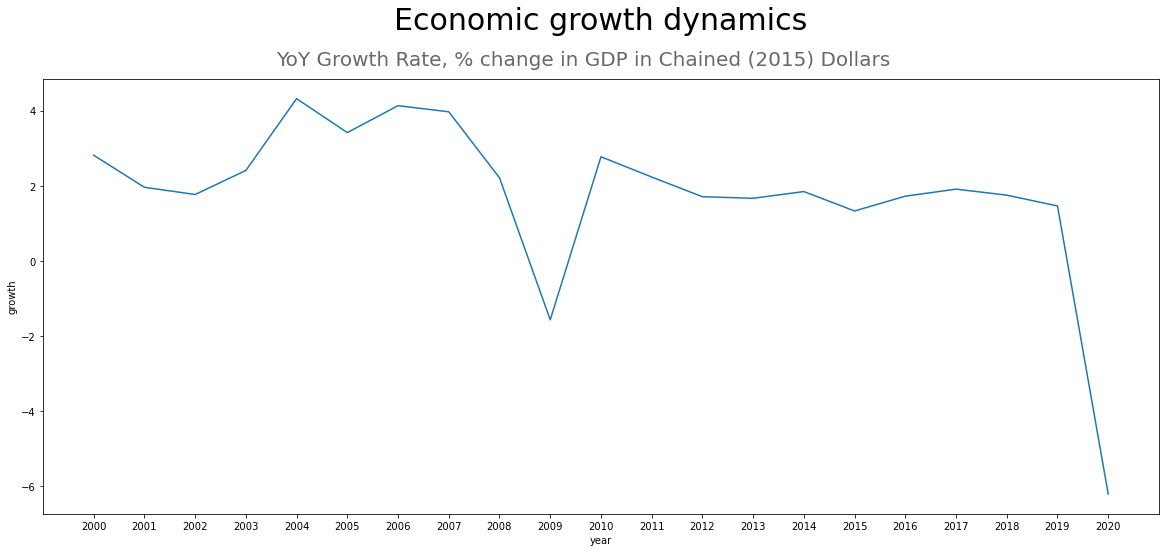

In [485]:
plt.figure(figsize=(20,8))
ax = sns.lineplot(data=df.groupby('year').agg({'growth': 'mean'}), x='year', y='growth')
ax.set_title('Economic growth dynamics',fontsize=30,y=1.1,x=0.5)
plt.suptitle("YoY Growth Rate, % change in GDP in Chained (2015) Dollars",fontsize=20,y=0.93,x=0.5,color='dimgrey')

Over the past 20 years, the average global economic growth has remained in the range of 2–3%, with significant downturns during the Great Recession of 2008–2009 and the COVID-19 crisis in 2020.

In [486]:
# Top-10 states with highest growth rate in the 21st century
df.groupby('country', as_index=False) \
    .agg({'growth': 'mean'}) \
    .sort_values('growth', ascending=False) \
    .head(10)

,country,growth
132,Myanmar,8.677950
39,China,8.076444
12,Azerbaijan,6.949416
197,Turkmenistan,6.534897
134,Nauru,6.469713
8,Armenia,6.132092
62,Ethiopia,5.836728
32,Cambodia,5.496415
70,Georgia,5.377521
209,Viet Nam,5.362306


We can observe a shift in the center of the global economy towards Asia, with China and three ASEAN countries (Myanmar, Cambodia, and Vietnam) ranking among the top.
<br>
Additionally, the ranking includes four post-Soviet countries (Azerbaijan, Turkmenistan, Armenia, and Georgia), -
whose growth can be attributed to the low base effect, the transition to a market economy, and improvements in public governance.

In [487]:
df['year'] = df['year'].astype(int)

In [488]:
# Top-10 states with highest growth rate in the first decade of the 21st century
years_first = list(range(2000,2011))
df.query("year in @years_first") \
    .groupby('country', as_index=False) \
    .agg({'growth': 'mean'}) \
    .sort_values('growth', ascending=False) \
    .head(10)

,country,growth
12,Azerbaijan,13.467456
58,Equatorial Guinea,13.377387
132,Myanmar,11.270905
39,China,9.721003
8,Armenia,8.792121
114,Macao,8.533296
17,Belarus,7.843096
98,Kazakhstan,7.609974
70,Georgia,6.857766
22,Bhutan,6.760440


In [489]:
# Top-10 states with highest growth rate in the second decade of the 21st century
years_second = list(range(2011,2021))
df.query("year in @years_second") \
    .groupby('country', as_index=False) \
    .agg({'growth': 'mean'}) \
    .sort_values('growth', ascending=False) \
    .head(10)

,country,growth
134,Nauru,7.879173
81,Guyana,7.237356
59,Eritrea,7.207773
197,Turkmenistan,6.806177
39,China,6.267429
62,Ethiopia,6.206663
132,Myanmar,5.825700
91,Ireland,5.742380
15,Bangladesh,5.235509
209,Viet Nam,5.109341


We can see that Myanmar and China rank among the top in both decades of the 21st century. 
<br>
Notable trends include rapid growth in post-Soviet countries with developing market economies (Azerbaijan, Armenia, Kazakhstan, Georgia), as well as in those with weaker market structures (Belarus, Turkmenistan). Additionally, strong economic expansion is evident in Southeast Asian nations (Myanmar, Bhutan, Bangladesh, Vietnam) and China. 
<br>
It is also noteworthy that in the 2010s, Ireland was the only European country in the ranking, experiencing high growth due to extensive economic liberalization and the relocation of numerous companies to the country.

Text(0.5, 0.93, 'YoY Real GDP growth (%) and Size of government in the World')

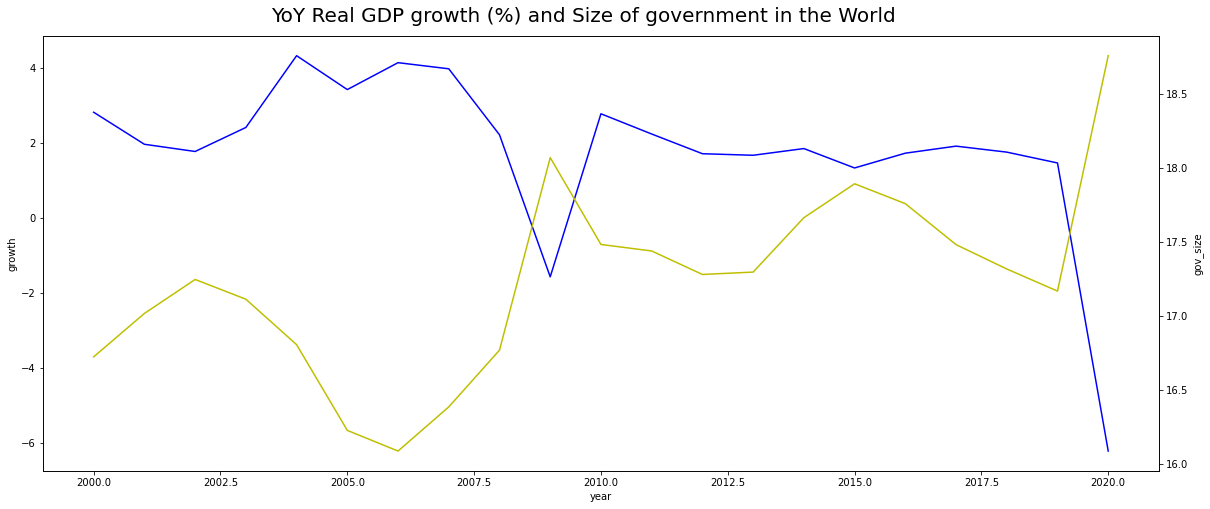

In [490]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df.groupby('year').agg({'growth': 'mean'}), x='year', y='growth', color='b')
ax2 = plt.twinx()
sns.lineplot(data=df.groupby('year').agg({'gov_size': 'mean'}), x='year', y='gov_size', color='y', ax=ax2)
plt.suptitle("YoY Real GDP growth (%) and Size of government in the World",fontsize=20,y=0.93,x=0.5)

The graph clearly demonstrates an inverse relationship between GDP growth and the share of the public sector in the economy.

# Part 3: Panel regression with growth as dependend variable and size of government as well as other covariats as independent variables

We are building a **panel regression** for quantitative estimation of the impact of government size on economic growth. 
<br>
<br>
Given the panel nature of the data, we assume the presence of **country-specific, time-invariant unobserved factors**. Additionally, there are **factors common to all countries but specific to each year**, capturing the impact of short-term shocks and crises on the economy. To control for these unobserved factors, we introduce dummy variables—cross-section and time effects. 
<br>
<br>
**Fixed effects** are preferred in our situation, as they allow for the possibility that unobserved country-specific and time-specific effects may be correlated with the model’s explanatory variables. Moreover, the dataset consists of units with distinct individual characteristics. By incorporating such effects, we obtain consistent and unbiased estimates. 

In [491]:
df['ln_gdp'] = np.log(df['gdp'])
df['ln_gdp_pc'] = np.log(df['gdp_pc'])

In [492]:
df['year'] = pd.to_datetime(df['year'])
df = df.set_index(['country', 'year'])

In [493]:
exog = sm.tools.tools.add_constant(df[['gov_size', 'inflation', 'capital', 'trade', 'population', 'ln_gdp', 'ln_gdp_pc']])
endog = df['growth']
model_fe = PanelOLS(endog, exog, entity_effects = True, time_effects = True) 
fe_res = model_fe.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 growth   R-squared:                        0.0764
Estimator:                   PanelOLS   R-squared (Between):             -14.021
No. Observations:                3178   R-squared (Within):               0.0066
Date:                Mon, Aug 01 2022   R-squared (Overall):             -2.0174
Time:                        22:30:18   Log-likelihood                   -8857.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      35.273
Entities:                         166   P-value                           0.0000
Avg Obs:                       19.145   Distribution:                  F(7,2985)
Min Obs:                       3.0000                                           
Max Obs:                       21.000   F-statistic (robust):             35.273
                            

D:\LEON\Anaconda\lib\site-packages\linearmodels\shared\exceptions.py:35: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


The model is highly significant, with the **coefficient for the public sector being statistically significant at the 1% level**. The magnitude and sign of the coefficient indicate that a 1 percentage point increase in the size of government leads to a 0.17 percentage point decline in economic growth rates.

# Part 4: Adding institution to observe their influence on connection between government size and economic growth

We now add a new independent variable - a measure of a country's institutional development, which is most commonly used in similar studies—**Rule of Law**. 
<br>
<br>
This indicator reflects not only the principle of equality before the law but also the degree to which the state guarantees and protects citizens' rights. It is particularly relevant in areas such as **property rights specification and protection, contract enforcement, police effectiveness, and judicial independence**. From a theoretical perspective, it is these institutional characteristics which contribute most to economic growth. 
<br>
Moreover, this factor is highly correlated with other measures of institutional development.

In [494]:
exog = sm.tools.tools.add_constant(df[['gov_size', 'inflation', 'capital', 'trade', 'population', 'ln_gdp', 'ln_gdp_pc', 'rule_law']])
endog = df['growth']
model_fe = PanelOLS(endog, exog, entity_effects = True, time_effects = True) 
fe_res = model_fe.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 growth   R-squared:                        0.0851
Estimator:                   PanelOLS   R-squared (Between):             -15.776
No. Observations:                3024   R-squared (Within):              -0.0009
Date:                Mon, Aug 01 2022   R-squared (Overall):             -2.1999
Time:                        22:30:22   Log-likelihood                   -8445.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      32.945
Entities:                         164   P-value                           0.0000
Avg Obs:                       18.439   Distribution:                  F(8,2833)
Min Obs:                       4.0000                                           
Max Obs:                       20.000   F-statistic (robust):             32.945
                            

We also include in the equation the interaction term between institutional quality and size of government to capture the interplay between these factors.

In [495]:
mod = PanelOLS.from_formula('growth ~ 1 + gov_size + inflation + capital + trade + population + ln_gdp + ln_gdp_pc + rule_law + rule_law * gov_size + EntityEffects + TimeEffects', df)
fe_res = mod.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 growth   R-squared:                        0.0910
Estimator:                   PanelOLS   R-squared (Between):             -13.337
No. Observations:                3024   R-squared (Within):               0.0248
Date:                Mon, Aug 01 2022   R-squared (Overall):             -1.8109
Time:                        22:30:29   Log-likelihood                   -8436.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      31.490
Entities:                         164   P-value                           0.0000
Avg Obs:                       18.439   Distribution:                  F(9,2832)
Min Obs:                       4.0000                                           
Max Obs:                       20.000   F-statistic (robust):             31.490
                            

The first model is highly significant, with the **coefficient for institutional quality** also being **highly significant but negative**. The model with the interaction term is also highly significant, but while the coefficient for institutional quality is insignificant, **the interaction term is significantly negative**. That contradicts theoretical expectations.
<br>
<br>
This suggests the potential issue of **endogeneity**. Institutional quality may not be entirely exogenous due to possible causality issues. 
<br>
<br>
Not only does a well-developed institutional environment foster economic growth, but the reverse relationship also exists. For instance, high economic growth rates provide countries with the resources to develop institutions, improve legal frameworks, and allocate more resources toward property rights protection and contract enforcement. Additionally, rapid growth strengthens the middle class, increases overall prosperity, and consequently raises societal demand for better institutions and stronger legal protections. As a result, **coefficient estimates may be biased**.

# Part 5: Adding instrumental variables to dealing with endogenity issues

To address endogeneity, we introduce **instrumental variables** and apply **two-stage least squares** (2SLS) estimation.
<br>
<br>
It is necessary to identify variables that **explain institutional quality, are correlated with it, but are uncorrelated with the model's error term**. As instruments, we select a country's average **geographic latitude** and the **legal family** from which its legislation originates. 
<br>
<br>
Average latitude is a geographical factor that significantly influences institutional development. It captures various historical and environmental effects, including a country's colonial past, which creates a path dependence that shapes institutional evolution. 
<br>
<br>
Dummy variables for legal families (British, French, German, Scandinavian, or Socialist) reflect historical attitudes toward property rights and contract enforcement. Among these, the British legal system is known for the strongest property rights protections. Legal traditions also exhibit path dependence, affecting how institutions develop over time. 

In the first stage, we estimate institutional quality using a regression on all exogenous variables in the model, as well as the instrumental variables (latitude and legal tradition). 
<br>

<br>
In the second stage, we estimate the impact of explanatory variables on economic growth, replacing the Rule of Law measure from the World Bank with the predicted values obtained in the first stage.

In [496]:
# the data concerning latitude is taken from Google - https://developers.google.com/public-data/docs/canonical/countries_csv
df_latitude = pd.read_excel('latitude.xlsx')
df_latitude = df_latitude.rename(columns={'country': 'Alpha-2 code'})
df_latitude

,Alpha-2 code,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [497]:
# the data about legal family is taken from the website - # https://scholar.harvard.edu/shleifer/publications/economic-consequences-legal-origins
df_legor = pd.read_excel('economiccon_data.xls', sheet_name='Table 1')
df_legor = df_legor.set_index(['country', 'code'])
df_legor = df_legor.iloc[:,11:16]
df_legor = df_legor.dropna()
df_legor = df_legor.reset_index().rename(columns={'country': 'name', 'code': 'country'})
df_legor

,name,country,legor_uk,legor_fr,legor_ge,legor_sc,legor_so
0,Aruba,ABW,0,1,0,0,0
1,Afghanistan,AFG,0,1,0,0,0
2,Angola,AGO,0,1,0,0,0
3,Anguilla,AIA,1,0,0,0,0
4,Albania,ALB,0,1,0,0,0
...,...,...,...,...,...,...,...
184,Serbia and Montenegro,YUG,0,1,0,0,0
185,South Africa,ZAF,1,0,0,0,0
186,"Congo, Dem. Rep.",ZAR,0,1,0,0,0
187,Zambia,ZMB,1,0,0,0,0


In [498]:
instruments = country_codes.merge(df_legor, on='country', how='left') \
    .merge(df_latitude, on='Alpha-2 code', how='left') \
    .rename(columns={'Country': 'country', 'country': 'code'})

In [499]:
df = df.reset_index()
df = df.merge(instruments[['country', 'legor_uk', 'legor_fr', 'legor_ge', 'legor_sc', 'legor_so', 'latitude']],
        on='country',
        how='left')

In [501]:
df = df.set_index(['country', 'year'])

In [502]:
df['legor_uk'] = df['legor_uk'].astype(float)
df['legor_fr'] = df['legor_fr'].astype(float)
df['legor_ge'] = df['legor_ge'].astype(float)
df['legor_sc'] = df['legor_sc'].astype(float)
df['legor_so'] = df['legor_so'].astype(float)

In [503]:
dependent = df['growth']
exog = sm.add_constant(df[['gov_size', 'inflation', 'capital', 'trade', 'population', 'ln_gdp', 'ln_gdp_pc']])
endog = df['rule_law']
instruments = df[['latitude', 'legor_uk', 'legor_fr', 'legor_ge', 'legor_sc']]
mod = IV2SLS(dependent, exog, endog, instruments)
res = mod.fit()
res

D:\LEON\Anaconda\lib\site-packages\linearmodels\shared\exceptions.py:35: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                 growth   R-squared:                      0.1088
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1063
No. Observations:                2885   F-statistic:                    221.03
Date:                Mon, Aug 01 2022   P-value (F-stat)                0.0000
Time:                        22:31:20   Distribution:                  chi2(8)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          4.9912     2.3823     2.0951     0.0362      0.3219      9.6605
gov_size      -0.2051     0.0337    -6.0870     0.0000     -0.2712     -0.1391
inflation     -0.0164     0.0066    -2.4845     0.0130     -0.0293     -0.0035
capital        0.0964     0.0150     6.4295     0.0000      0.0670      0.1258
trade          0.0103     0.0018     5.6090     0.0000      0.0067      0.0140
population    -0.6629     0.0805    -8.2358     0.0000     -0.8206     -0.5051
ln_gdp         0.1860     0.0574     3.2382     0.0012      0.0734      0.2986
ln_gdp_pc     -0.7665     0.2561    -2.9934     0.0028     -1.2684     -0.2646
rule_law       0.4710     0.4440     1.0609     0.2888     -0.3992      1.3413
==============================================================================

Endogenous: rule_law
Instruments: latitude, legor_uk, legor_fr, legor_ge, legor_sc
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x145337f8040

The coefficient for institutional quality is **positive**, but it is statistically **insignificant**. However, our primary research interest is not the direct effect of institutions on growth but rather whether high-quality institutions can mitigate the negative impact of a large public sector on economic growth. To test this, we include the interaction term between government size and institutional quality (instrumented).

In [504]:
formula = (
    "growth ~ 1 + gov_size + inflation + capital + trade + population + ln_gdp + ln_gdp_pc + gov_size:rule_law [rule_law ~ latitude + legor_uk + legor_fr + legor_ge + legor_sc]"
)
mod = IV2SLS.from_formula(formula, df)
res_formula = mod.fit(cov_type="robust")
res_formula

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                 growth   R-squared:                      0.1020
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0992
No. Observations:                2885   F-statistic:                    273.12
Date:                Mon, Aug 01 2022   P-value (F-stat)                0.0000
Time:                        22:31:25   Distribution:                  chi2(9)
Cov. Estimator:                robust                                         
                                                                              
                                 Parameter Estimates                                 
=====================================================================================
                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------
Intercept             1.0554     2.4053     0.4388     0.6608     -3.6589      5.7698
gov_size             -0.1838     0.0341    -5.3917     0.0000     -0.2506     -0.1170
inflation            -0.0200     0.0064    -3.1304     0.0017     -0.0326     -0.0075
capital               0.0995     0.0150     6.6234     0.0000      0.0700      0.1289
trade                 0.0137     0.0022     6.3104     0.0000      0.0095      0.0180
population           -0.6754     0.0803    -8.4101     0.0000     -0.8328     -0.5180
ln_gdp                0.1990     0.0573     3.4710     0.0005      0.0866      0.3113
ln_gdp_pc            -0.4458     0.2083    -2.1406     0.0323     -0.8541     -0.0376
gov_size:rule_law     0.0969     0.0294     3.2974     0.0010      0.0393      0.1545
rule_law             -1.8752     0.7283    -2.5746     0.0100     -3.3026     -0.4477
=====================================================================================

Endogenous: rule_law
Instruments: latitude, legor_uk, legor_fr, legor_ge, legor_sc
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x1453125bbb0

# Part 6: Conclusion

The results show a highly significant positive coefficient for the interaction term. We can describe the overall effect of the government size on economic growth as follows:

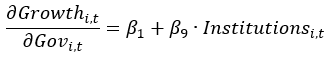

where β₁ is the coefficient for the public sector, and β₉ is the coefficient for the interaction term. This implies that as institutional quality improves, the negative effect of β₁ is offset. Thus, our hypothesis is confirmed: while a large public sector generally hinders economic growth, strong institutions can mitigate or even neutralize this negative impact.